In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("housing.csv")

Saving data in new_df to avoid any loses. Work will be done in new_df.


In [3]:
new_df=df

In [4]:
new_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
new_df.shape

(20640, 10)

Data Exploration

<Axes: xlabel='longitude', ylabel='latitude'>

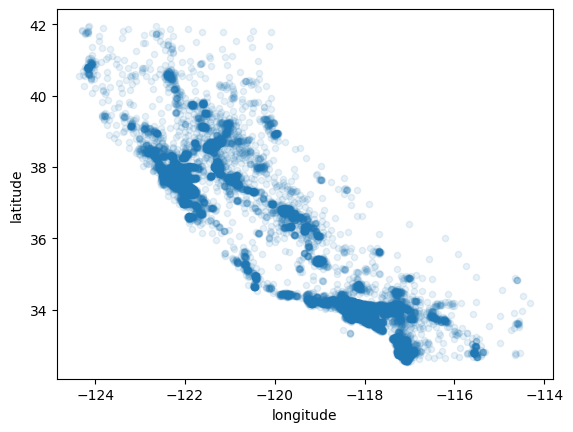

In [34]:
new_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

From above we can conclude there is high density around bay areas.



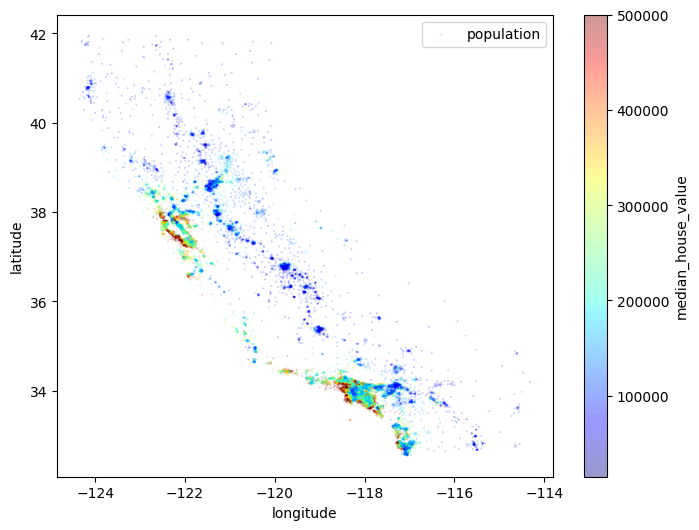

In [37]:
new_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=new_df["population"]/100, label="population", figsize=(8,6),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Housing prices are related to the location and to population density.

In [39]:
correlations = new_df.corr()
correlations["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.670085
<1H OCEAN             0.257614
NEAR BAY              0.160526
total_rooms           0.158506
NEAR OCEAN            0.140378
household_rooms       0.114094
housing_median_age    0.106432
households            0.072765
total_bedrooms        0.053311
ISLAND                0.023525
population           -0.021904
longitude            -0.045398
latitude             -0.144638
bedroom_ratio        -0.198690
INLAND               -0.484787
Name: median_house_value, dtype: float64

WE can se that median_income is highly corelated with median_house_value with a score of: 0.67

<Axes: xlabel='median_income', ylabel='median_house_value'>

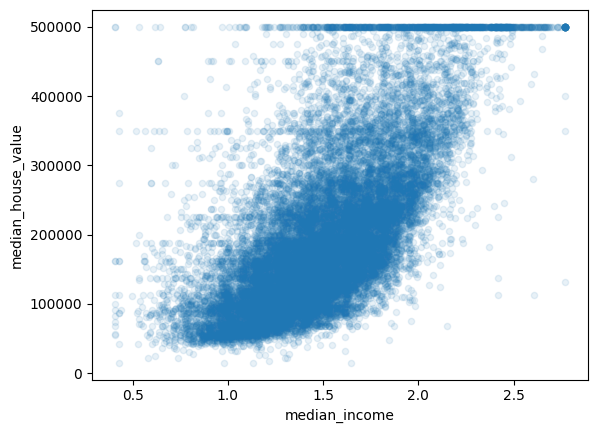

In [40]:
new_df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

We can see that the corelation is highly strong but, we need to remove outliers that may afffect the model performance.


This data has 20,640 rows and 10 columns.
Since we want to predict Median house value median_house_value will be target variable

Doing data analysis:
1. finding and handling missing values
2. finding and handling outliers
3. finding relationship between features and target variable

In [6]:
new_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Since this particular dataset has 20,640 rows and only 207 missing values best way to handle them is to drop them.

In [7]:
new_df.dropna(inplace=True)

In [8]:
new_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Finding and handling outliers

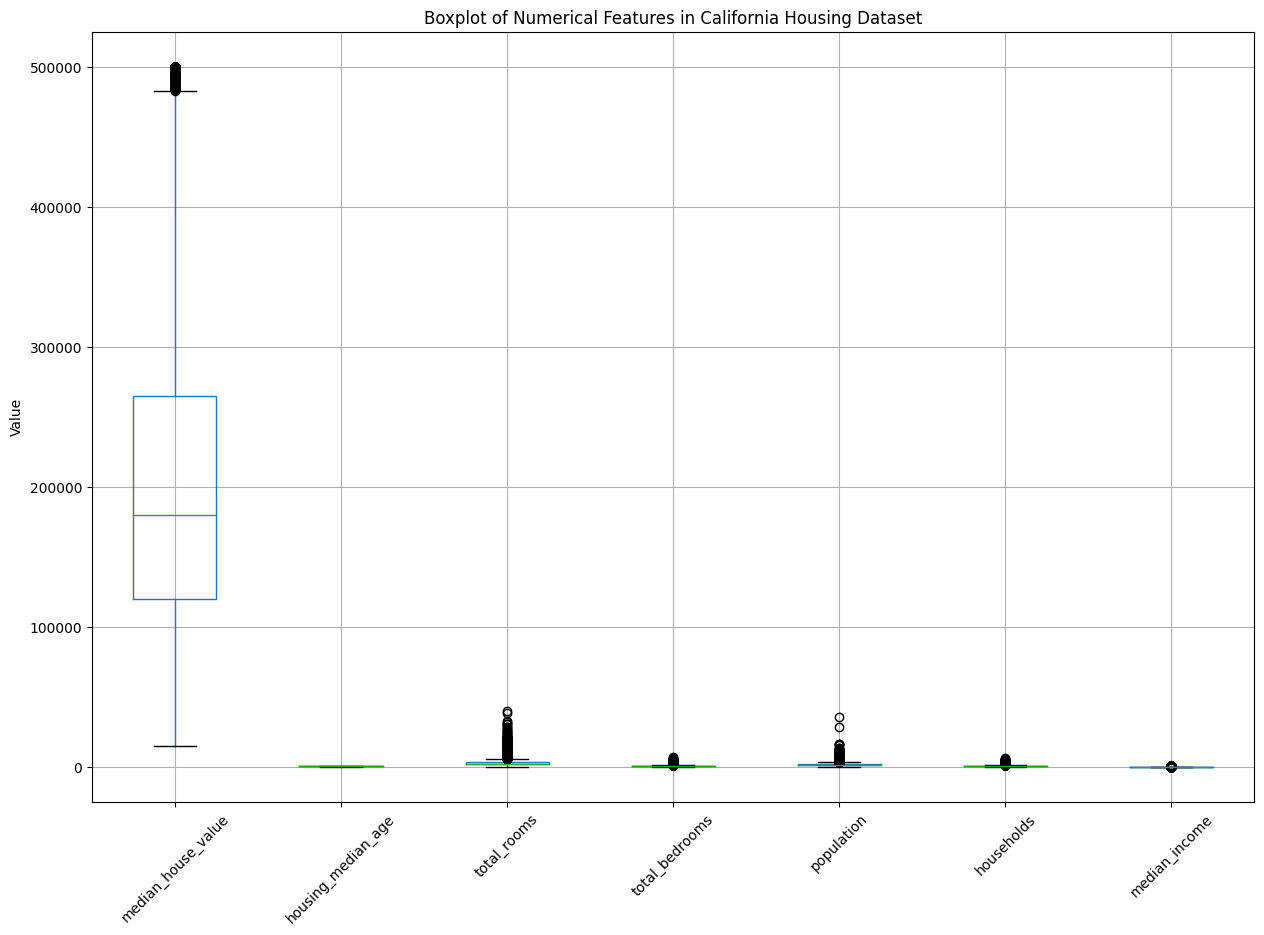

In [9]:
numerical_features = ['median_house_value', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Create a box plot for each numerical feature
plt.figure(figsize=(15, 10))
df[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.title('Boxplot of Numerical Features in California Housing Dataset')
plt.show()

To treat outlier better we need to look if data is skewed or not

Since data was skewed we used Log transformation technique to reduce the impact of outliers

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

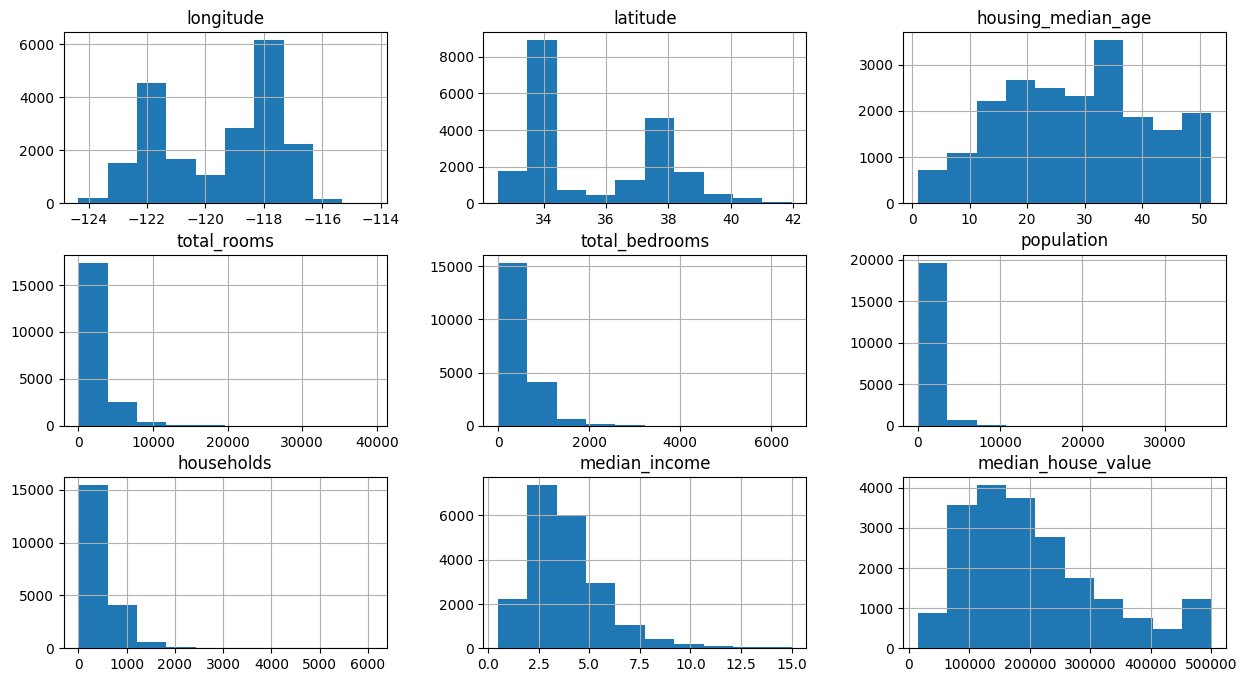

In [10]:
df.hist(figsize=(15,8))

In [11]:
new_df['total_rooms']=np.log(new_df['total_rooms']+1)
new_df['total_bedrooms']=np.log(new_df['total_bedrooms']+1)
new_df['population']=np.log(new_df['population']+1)
new_df['households']=np.log(new_df['households']+1)
new_df['median_income']=np.log(new_df['median_income']+1)


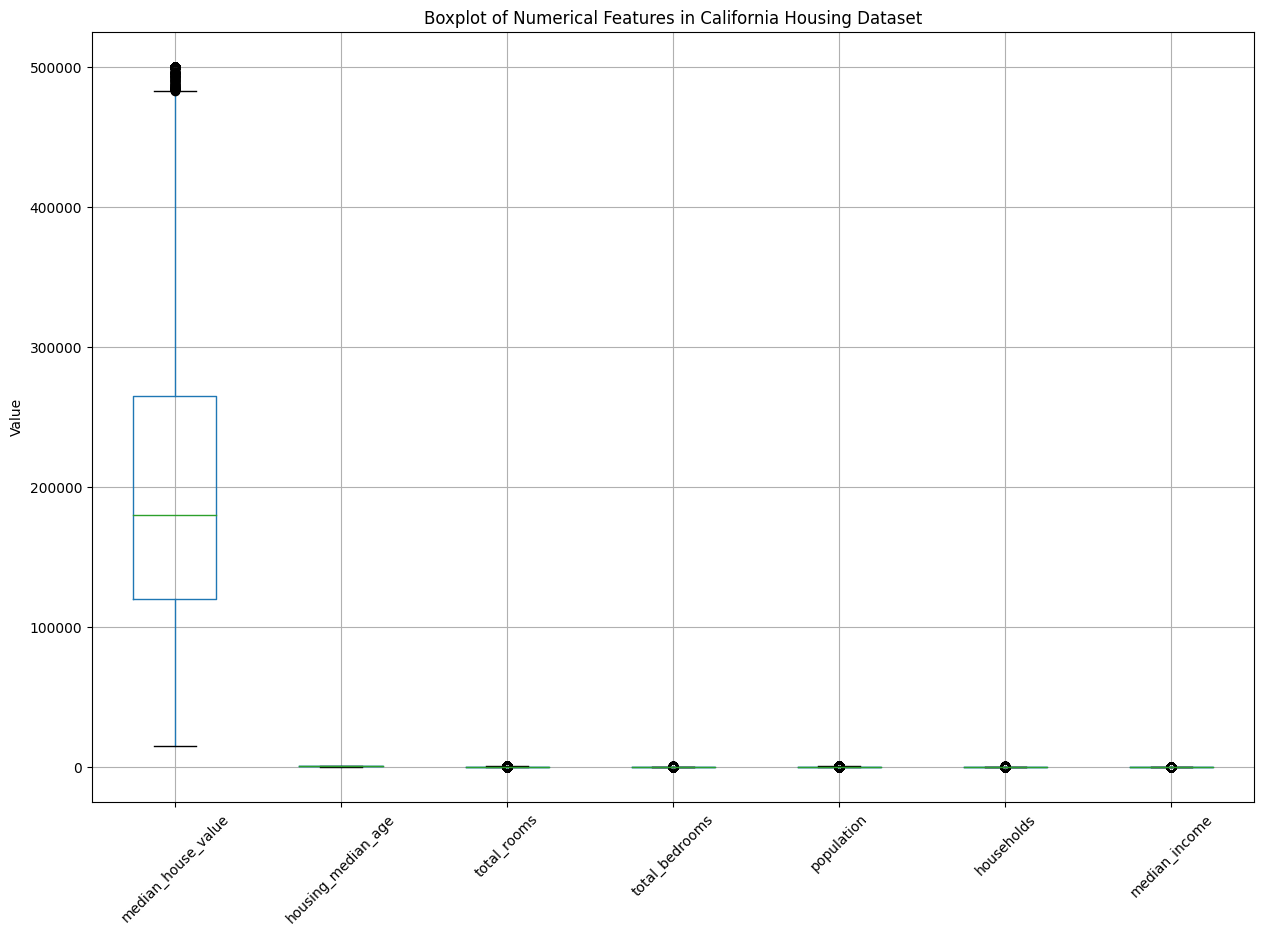

In [12]:
numerical_features = ['median_house_value', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Create a box plot for each numerical feature
plt.figure(figsize=(15, 10))
df[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.title('Boxplot of Numerical Features in California Housing Dataset')
plt.show()

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [14]:
new_df.ocean_proximity.value_counts()


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

Converting categorical feature "ocean_proximity" using One-hot Encoding

In [15]:
new_df=new_df.join(pd.get_dummies(new_df.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [16]:
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,0.940124,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,1.268861,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,0.993252,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.053336,84700.0,0,1,0,0,0


Creating new feature:-
- bedroom_ratio = number of bedrooms out of total rooms
- household_rooms = number of rooms per household 

In [17]:
new_df['bedroom_ratio']=new_df['total_bedrooms']/new_df['total_rooms']
new_df['household_rooms']= new_df['total_rooms']/new_df['households']

<Axes: >

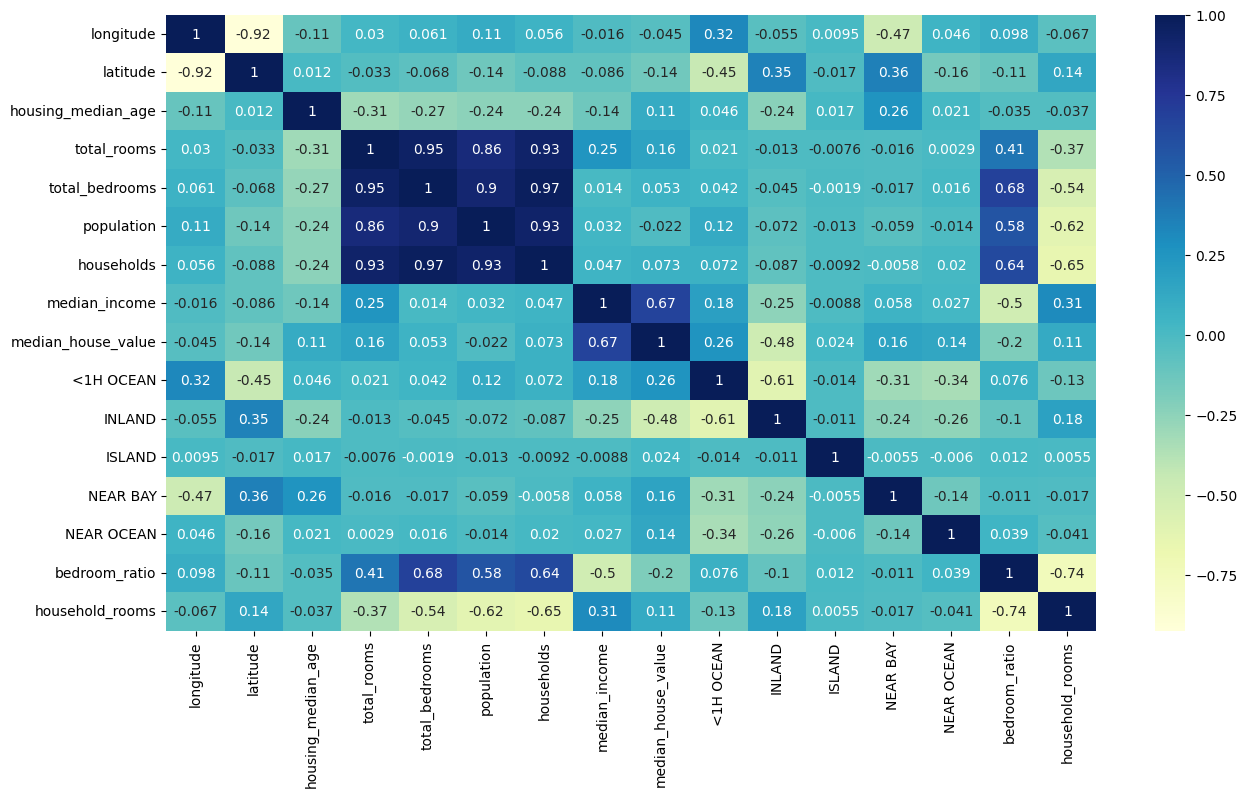

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(new_df.corr(), annot=True, cmap="YlGnBu")

From above correlation hetmap we can derive these insights:-
- median house value increases near the bay area and decreases as we move towards the state
- there is a positive corelation with total_rooms
- there is strong positive corelation between median_income meaning as income increases median house value increases


<Axes: xlabel='latitude', ylabel='longitude'>

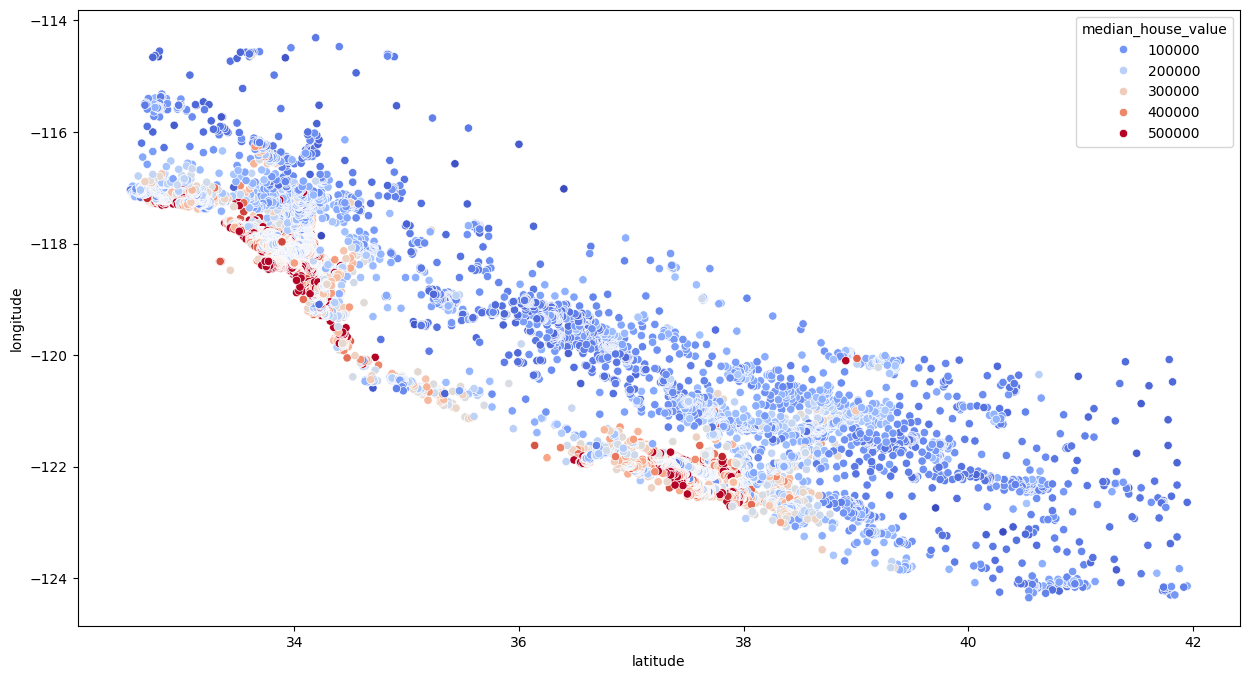

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=new_df, hue="median_house_value", palette="coolwarm")

In [20]:
from sklearn.model_selection import train_test_split

x=new_df.drop(['median_house_value'], axis=1)
y=new_df['median_house_value']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
train_data=x_train.join(y_train)

Using Linear regression algorithm


In [22]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg=LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [23]:
test_data = x_test.join(y_test)

In [24]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [25]:
reg.score(x_test, y_test)

0.6336700332955201

Random Forest Regeression

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
forest.score(x_test, y_test)

0.8239719697418785

Using XG boost Algorithm

In [28]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

In [29]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
x_train.rename(columns={'<1H OCEAN': '1H OCEAN'}, inplace=True)

In [30]:
xgb_reg.fit( x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
#x_test.drop('ocean_proximity', axis=1, inplace=True)
missing_cols = set(x_train.columns) - set(x_test.columns)
for col in missing_cols:
    x_test[col] = 0
x_test = x_test[x_train.columns]

In [32]:
y_pred = xgb_reg.predict(x_test)

Using mean squared error to evaluate model performance


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score:", r2)

R-squared score: 0.8306994399235711


Conclusion:-
- Random forest regression algorithm is most effective among Linear Regeression and XG Boost.
- Random forest have an accuracy score of 0.8185 or 81.85% accurate.
- XG Boost have an accuracy score of 0.8126 0r 81.26%.



In [41]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = { "n_estimators": [100,20,300],
              "min_samples_split":[2,4],
              "max_depth":[None, 4, 8]
              }
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 20, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [43]:
grid_search.best_estimator_.score(x_test,y_test)

0.812445185050232

We are getting less score after hyperparameter tuning